In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
train_df = pd.read_excel('data/Data_Train.xlsx')
# pd.set_option('display.max_columns', None)
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train_df.info()  #check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
train_df.shape

(10683, 11)

In [5]:
#remove null values 
train_df.dropna(inplace=True)

In [6]:
train_df.isnull().sum()  # check for missing values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## EDA 

In [7]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
# do the proper format of all columns
# 1. date of journey, here we have date, month and year

# you can use this method as well
# final_df['Date']=final_df['Date_of_Journey'].str.split('/').str[0]
# final_df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]
# final_df['Year']=final_df['Date_of_Journey'].str.split('/').str[2]

train_df['Journey_date'] = pd.to_datetime(train_df['Date_of_Journey'], format="%d/%m/%Y").dt.day

In [9]:
train_df['Journey_month'] = pd.to_datetime(train_df['Date_of_Journey'], format="%d/%m/%Y").dt.month

In [10]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [11]:
train_df.drop(['Date_of_Journey'],axis=1, inplace=True)

In [12]:
train_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3


In [13]:
train_df['Dep_hour'] = pd.to_datetime(train_df['Dep_Time']).dt.hour

In [14]:
train_df['Dep_minute'] = pd.to_datetime(train_df['Dep_Time']).dt.minute

In [15]:
train_df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25


In [16]:
train_df.drop(['Dep_Time'],axis=1, inplace=True)


In [17]:
train_df.head(6)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
5,SpiceJet,Kolkata,Banglore,CCU → BLR,11:25,2h 25m,non-stop,No info,3873,24,6,9,0


In [18]:
train_df['Arrival_hour']=train_df['Arrival_Time'].str.split(':').str[0]

In [19]:
train_df['Arrival_minute']=train_df['Arrival_Time'].str.split(':').str[1].str.split(' ').str[0]

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Journey_date     10682 non-null  int64 
 10  Journey_month    10682 non-null  int64 
 11  Dep_hour         10682 non-null  int64 
 12  Dep_minute       10682 non-null  int64 
 13  Arrival_hour     10682 non-null  object
 14  Arrival_minute   10682 non-null  object
dtypes: int64(5), object(10)
memory usage: 1.3+ MB


In [21]:
# convert object type to int
train_df['Arrival_hour']=train_df['Arrival_hour'].astype(int)
train_df['Arrival_minute']=train_df['Arrival_minute'].astype(int)

In [22]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [23]:
train_df.drop(['Arrival_Time'],axis=1, inplace=True)

In [24]:
train_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Journey_date     10682 non-null  int64 
 9   Journey_month    10682 non-null  int64 
 10  Dep_hour         10682 non-null  int64 
 11  Dep_minute       10682 non-null  int64 
 12  Arrival_hour     10682 non-null  int32 
 13  Arrival_minute   10682 non-null  int32 
 14  Duration_hour    10682 non-null  object
dtypes: int32(2), int64(5), object(8)
memory usage: 1.2+ MB


In [28]:
# Duration
train_df['Duration_hour'] = train_df['Duration'].str.split(' ').str[0].str.split('h').str[0]
train_df['Duration_hour'] = train_df['Duration_hour'].astype(int)

ValueError: invalid literal for int() with base 10: '5m'

In [29]:
train_df[train_df['Duration_hour']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,6,3,16,50,16,55,5m


In [30]:
train_df.drop(6474,axis=0,inplace=True)

In [31]:
train_df['Duration_hour'] = train_df['Duration_hour'].astype(int)

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  object
 1   Source           10681 non-null  object
 2   Destination      10681 non-null  object
 3   Route            10681 non-null  object
 4   Duration         10681 non-null  object
 5   Total_Stops      10681 non-null  object
 6   Additional_Info  10681 non-null  object
 7   Price            10681 non-null  int64 
 8   Journey_date     10681 non-null  int64 
 9   Journey_month    10681 non-null  int64 
 10  Dep_hour         10681 non-null  int64 
 11  Dep_minute       10681 non-null  int64 
 12  Arrival_hour     10681 non-null  int32 
 13  Arrival_minute   10681 non-null  int32 
 14  Duration_hour    10681 non-null  int32 
dtypes: int32(3), int64(5), object(7)
memory usage: 1.2+ MB


In [33]:
train_df[train_df['Dep_hour']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour


In [34]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4


In [35]:
train_df['Duration_min'] = train_df['Duration'].str.split(' ').str[1].str.split('m').str[0]
train_df['Duration_min'] = train_df['Duration_min'].astype(int)

ValueError: cannot convert float NaN to integer

In [36]:
median_imputation = train_df['Duration_min'].median()
train_df['Duration_min'].fillna(median_imputation, inplace=True)

In [37]:
train_df['Duration_min'] = train_df['Duration_min'].astype(int)

In [38]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,30
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [39]:
train_df.drop(['Duration'],axis=1, inplace=True)

In [40]:
# Categorical data
train_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [41]:
train_df['Total_Stops'] = train_df['Total_Stops'].map({"non-stop":0,
                                                      "1 stop":1,
                                                      "2 stops":2,
                                                      "3 stops":3,
                                                      "4 stops":4})

In [42]:
# as we have total stops, im dropping route column
train_df.drop(['Route'],axis=1, inplace=True)

In [43]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,9,25,4,25,19,30
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,16,50,21,35,4,45


In [44]:
train_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [45]:
train_df['Additional_Info'].value_counts()

No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [46]:
train_df.drop(['Additional_Info'],axis=1, inplace=True)

In [47]:
# will do label encoding, can do OHE etc
label_encoder = LabelEncoder()

In [48]:
# train_df['Airline'] = label_encoder.fit_transform(train_df['Airline'])
# train_df['Source'] = label_encoder.fit_transform(train_df['Source'])
# train_df['Destination'] = label_encoder.fit_transform(train_df['Destination'])

In [49]:
#or
train_df = pd.get_dummies(train_df,columns=["Airline", "Source", "Destination"] ,drop_first = True)

In [50]:
train_df.head()

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,30,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10681 non-null  int64
 1   Price                                      10681 non-null  int64
 2   Journey_date                               10681 non-null  int64
 3   Journey_month                              10681 non-null  int64
 4   Dep_hour                                   10681 non-null  int64
 5   Dep_minute                                 10681 non-null  int64
 6   Arrival_hour                               10681 non-null  int32
 7   Arrival_minute                             10681 non-null  int32
 8   Duration_hour                              10681 non-null  int32
 9   Duration_min                               10681 non-null  int32
 10  Airline_Air India                          106

In [52]:
train_df.shape

(10681, 30)

In [63]:
test_df = pd.read_excel('data/Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [54]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


# EDA for test data

In [77]:

# test_df['Journey_date'] = pd.to_datetime(test_df['Date_of_Journey'], format="%d/%m/%Y").dt.day
# test_df['Journey_month'] = pd.to_datetime(test_df['Date_of_Journey'], format="%d/%m/%Y").dt.month

# test_df.drop(['Date_of_Journey'], axis=1, inplace=True)
# print('-------------------------------------------------------')

# test_df['Dep_hour'] = pd.to_datetime(test_df['Dep_Time']).dt.hour
# test_df['Dep_minute'] = pd.to_datetime(test_df['Dep_Time']).dt.minute

# test_df.drop(['Dep_Time'], axis=1, inplace=True)
# print('-------------------------------------------------------')

# test_df['Arrival_hour']=test_df['Arrival_Time'].str.split(':').str[0]
# test_df['Arrival_minute']=test_df['Arrival_Time'].str.split(':').str[1].str.split(' ').str[0]
# test_df['Arrival_hour']=test_df['Arrival_hour'].astype(int)
# test_df['Arrival_minute']=test_df['Arrival_minute'].astype(int)

# test_df.drop(['Arrival_Time'],axis=1, inplace=True)
# print('-------------------------------------------------------')

# test_df['Duration_hour'] = test_df['Duration'].str.split(' ').str[0].str.split('h').str[0]
# test_df[test_df['Duration_hour']=='5m']
# test_df.drop(2660,axis=0,inplace=True)
# test_df['Duration_hour'] = test_df['Duration_hour'].astype(int)

# print('-------------------------------------------------------')

# test_df['Duration_min'] = test_df['Duration'].str.split(' ').str[1].str.split('m').str[0]
# median_imputation_test = test_df['Duration_min'].median()
# test_df['Duration_min'].fillna(median_imputation_test, inplace=True)
# test_df['Duration_min'] = test_df['Duration_min'].astype(int)

# test_df.drop(['Duration'],axis=1, inplace=True)
# print('-------------------------------------------------------')

# test_df['Total_Stops'] = test_df['Total_Stops'].map({"non-stop":0,
#                                                       "1 stop":1,
#                                                       "2 stops":2,
#                                                       "3 stops":3,
#                                                       "4 stops":4})
# test_df.drop(['Route'],axis=1, inplace=True)
# print('-------------------------------------------------------')

# test_df.drop(['Additional_Info'],axis=1, inplace=True)
# print('-------------------------------------------------------')

# test_df = pd.get_dummies(test_df,columns=["Airline", "Source", "Destination"] ,drop_first = True)
# print('-------------------------------------------------------')

# test_df.head()
# test_df.info()
# test_df.shape

In [64]:
test_df['Journey_date'] = pd.to_datetime(test_df['Date_of_Journey'], format="%d/%m/%Y").dt.day
test_df['Journey_month'] = pd.to_datetime(test_df['Date_of_Journey'], format="%d/%m/%Y").dt.month

test_df.drop(['Date_of_Journey'], axis=1, inplace=True)

In [65]:
test_df['Dep_hour'] = pd.to_datetime(test_df['Dep_Time']).dt.hour
test_df['Dep_minute'] = pd.to_datetime(test_df['Dep_Time']).dt.minute

test_df.drop(['Dep_Time'], axis=1, inplace=True)

In [66]:
test_df['Arrival_hour']=test_df['Arrival_Time'].str.split(':').str[0]
test_df['Arrival_minute']=test_df['Arrival_Time'].str.split(':').str[1].str.split(' ').str[0]
test_df['Arrival_hour']=test_df['Arrival_hour'].astype(int)
test_df['Arrival_minute']=test_df['Arrival_minute'].astype(int)

test_df.drop(['Arrival_Time'],axis=1, inplace=True)

In [69]:
test_df['Duration_hour'] = test_df['Duration'].str.split(' ').str[0].str.split('h').str[0]
test_df[test_df['Duration_hour']=='5m']
test_df.drop(2660,axis=0,inplace=True)
test_df['Duration_hour'] = test_df['Duration_hour'].astype(int)

In [70]:
test_df['Duration_min'] = test_df['Duration'].str.split(' ').str[1].str.split('m').str[0]
median_imputation_test = test_df['Duration_min'].median()
test_df['Duration_min'].fillna(median_imputation_test, inplace=True)
test_df['Duration_min'] = test_df['Duration_min'].astype(int)

test_df.drop(['Duration'],axis=1, inplace=True)

In [71]:
test_df['Total_Stops'] = test_df['Total_Stops'].map({"non-stop":0,
                                                      "1 stop":1,
                                                      "2 stops":2,
                                                      "3 stops":3,
                                                      "4 stops":4})
test_df.drop(['Route'],axis=1, inplace=True)

In [72]:
test_df.drop(['Additional_Info'],axis=1, inplace=True)

In [73]:
test_df = pd.get_dummies(test_df,columns=["Airline", "Source", "Destination"] ,drop_first = True)

In [74]:
test_df.head()

,Total_Stops,Journey_date,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,30,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,30,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [75]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 0 to 2670
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                2670 non-null   int64
 1   Journey_date                               2670 non-null   int64
 2   Journey_month                              2670 non-null   int64
 3   Dep_hour                                   2670 non-null   int64
 4   Dep_minute                                 2670 non-null   int64
 5   Arrival_hour                               2670 non-null   int32
 6   Arrival_minute                             2670 non-null   int32
 7   Duration_hour                              2670 non-null   int32
 8   Duration_min                               2670 non-null   int32
 9   Airline_Air India                          2670 non-null   uint8
 10  Airline_GoAir                              2670 

In [76]:
test_df.shape

(2670, 28)

# Feature Selection

In [82]:
train_df.head()

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,30,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [79]:
train_df.shape

(10681, 30)

In [80]:
X = train_df.loc[:,['Total_Stops', 'Journey_date', 'Journey_month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hour',
       'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_date,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,30,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [81]:
y = train_df.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

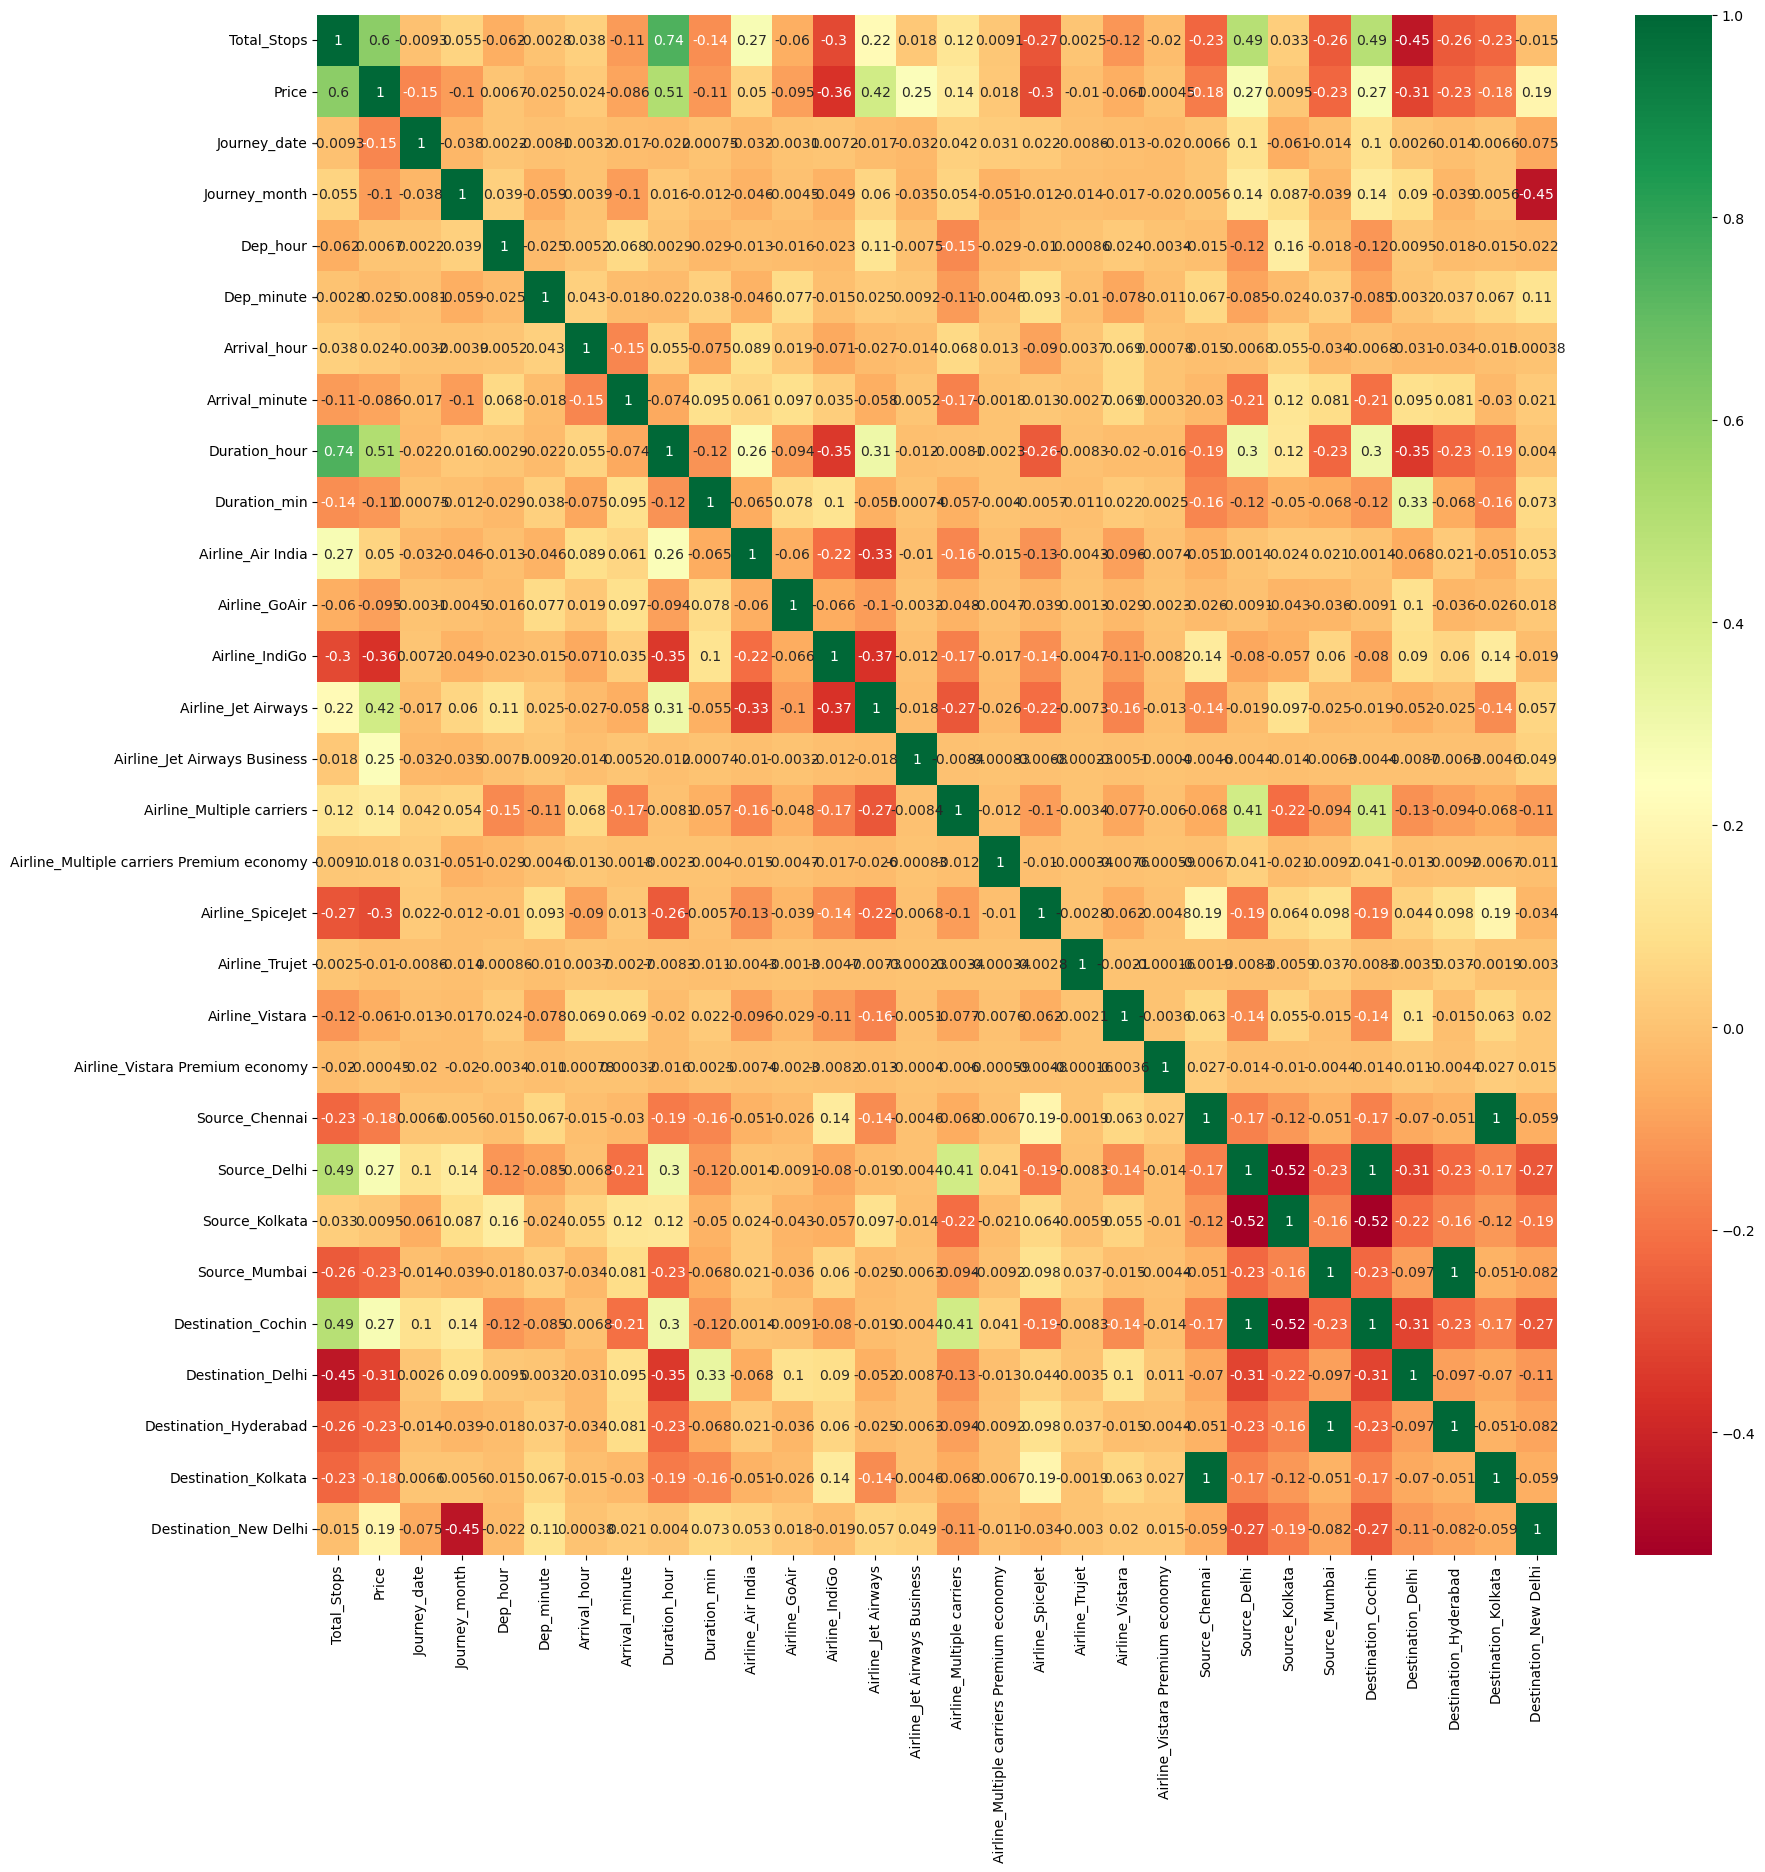

In [85]:
plt.figure(figsize=(20,20))
sns.heatmap(train_df.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [86]:
# to know the important feature you can use Extra Tree regressor
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [88]:
print(selection.feature_importances_)
print(selection.feature_names_in_)

[2.13849042e-01 1.43611833e-01 5.34721947e-02 2.48293925e-02
 2.19705455e-02 2.64420719e-02 1.92553886e-02 1.29847762e-01
 1.81355213e-02 9.99195448e-03 1.78732848e-03 1.63037160e-02
 1.41481027e-01 6.79207632e-02 1.87661426e-02 8.36367296e-04
 3.13415949e-03 1.15289425e-04 5.30294168e-03 8.13529085e-05
 4.52582893e-04 8.66327394e-03 3.20553436e-03 6.05136383e-03
 1.21938637e-02 1.80307347e-02 8.97962699e-03 5.58300292e-04
 2.47299245e-02]
['Total_Stops' 'Journey_date' 'Journey_month' 'Dep_hour' 'Dep_minute'
 'Arrival_hour' 'Arrival_minute' 'Duration_hour' 'Duration_min'
 'Airline_Air India' 'Airline_GoAir' 'Airline_IndiGo'
 'Airline_Jet Airways' 'Airline_Jet Airways Business'
 'Airline_Multiple carriers' 'Airline_Multiple carriers Premium economy'
 'Airline_SpiceJet' 'Airline_Trujet' 'Airline_Vistara'
 'Airline_Vistara Premium economy' 'Source_Chennai' 'Source_Delhi'
 'Source_Kolkata' 'Source_Mumbai' 'Destination_Cochin' 'Destination_Delhi'
 'Destination_Hyderabad' 'Destination_Kolkat

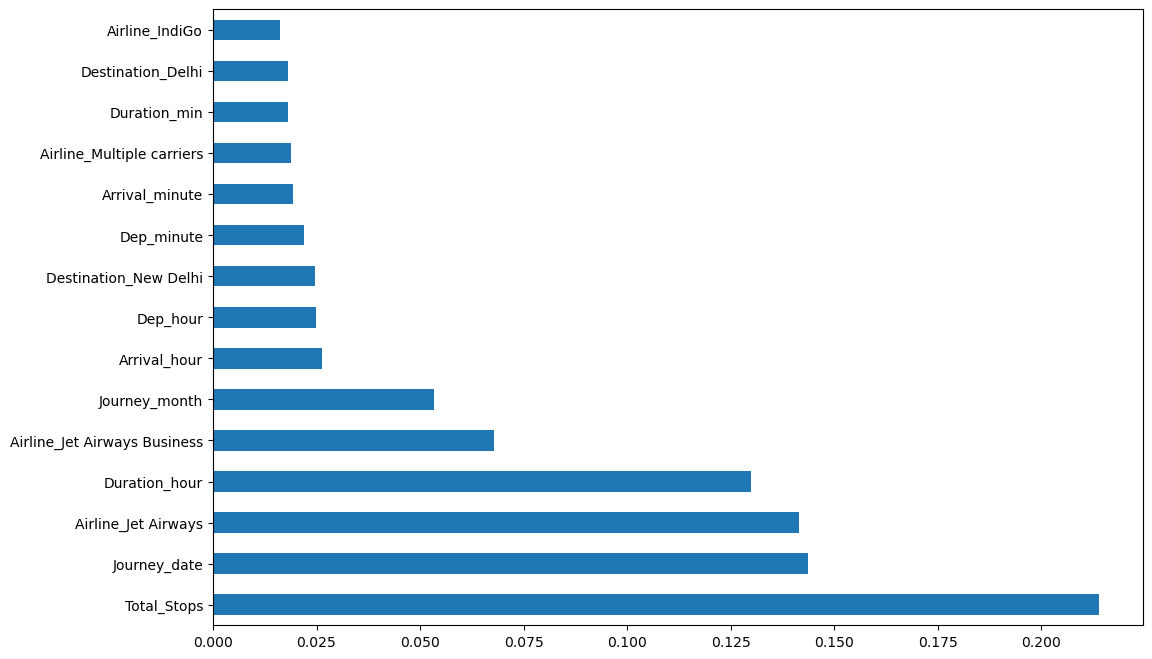

In [92]:
# to visualize
plt.figure(figsize=(12,8))

feat_imp = pd.Series(selection.feature_importances_,index=X.columns)
feat_imp.nlargest(15).plot(kind='barh')
plt.show()

# Model Training

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [120]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn import metrics

In [106]:
Models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

C:\Users\kumar\AppData\Local\Temp\ipykernel_26712\3518947902.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


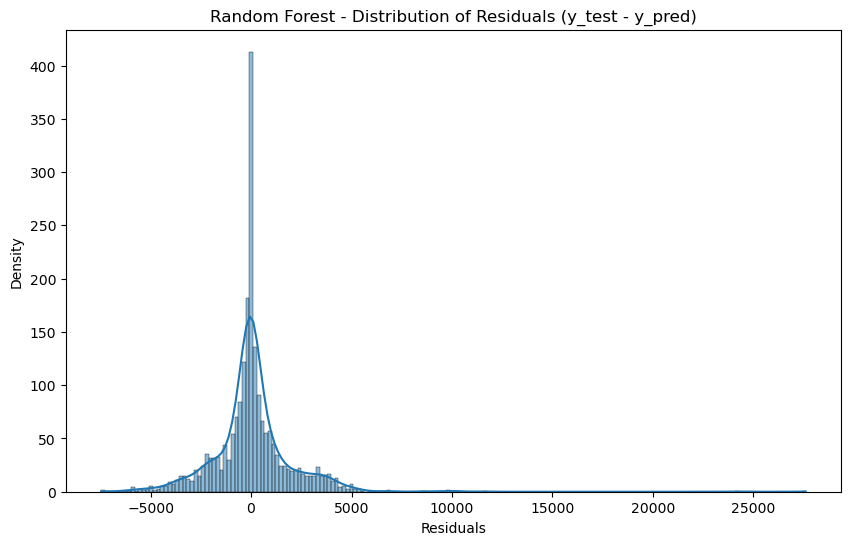

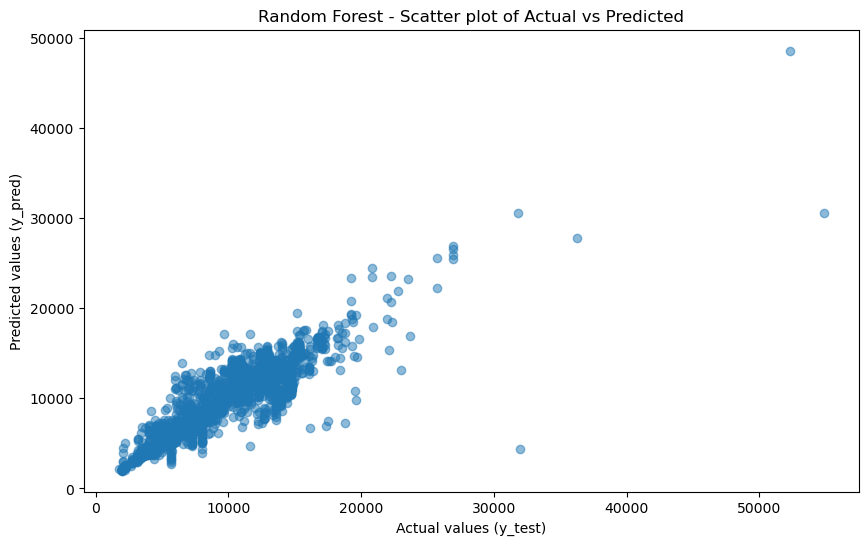

C:\Users\kumar\AppData\Local\Temp\ipykernel_26712\3518947902.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


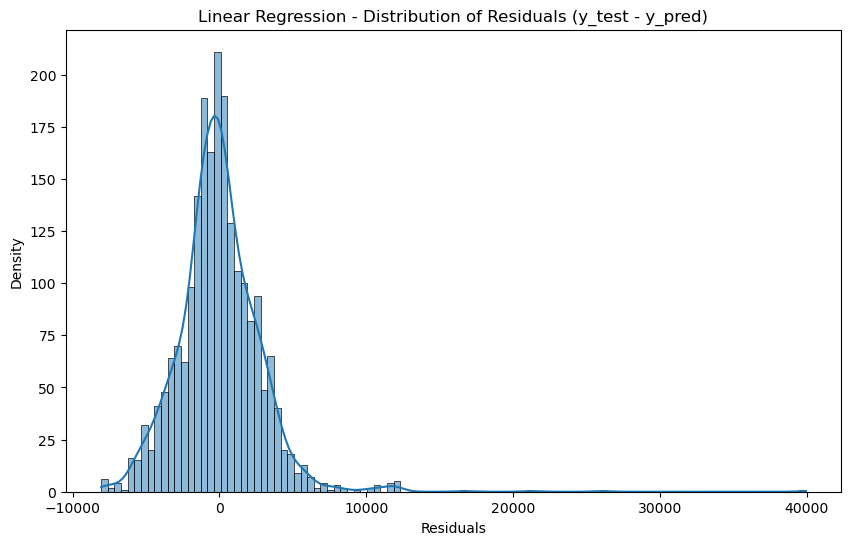

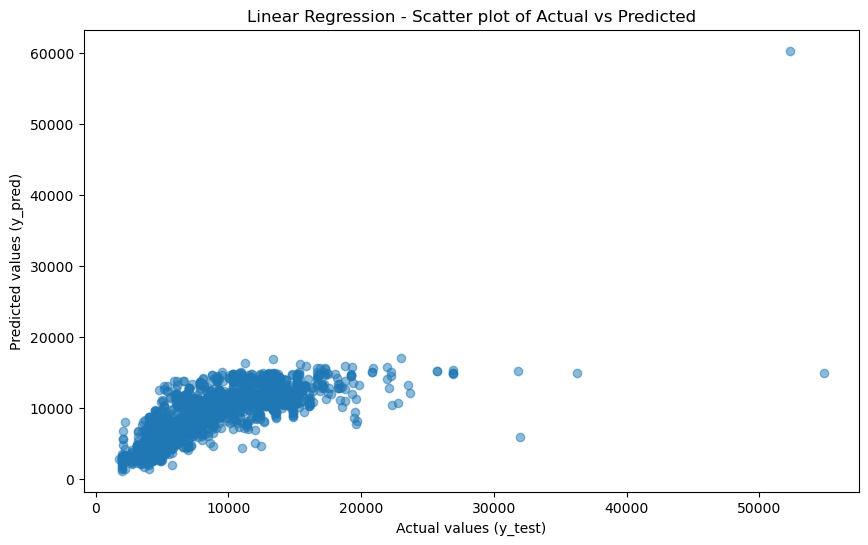

C:\Users\kumar\AppData\Local\Temp\ipykernel_26712\3518947902.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


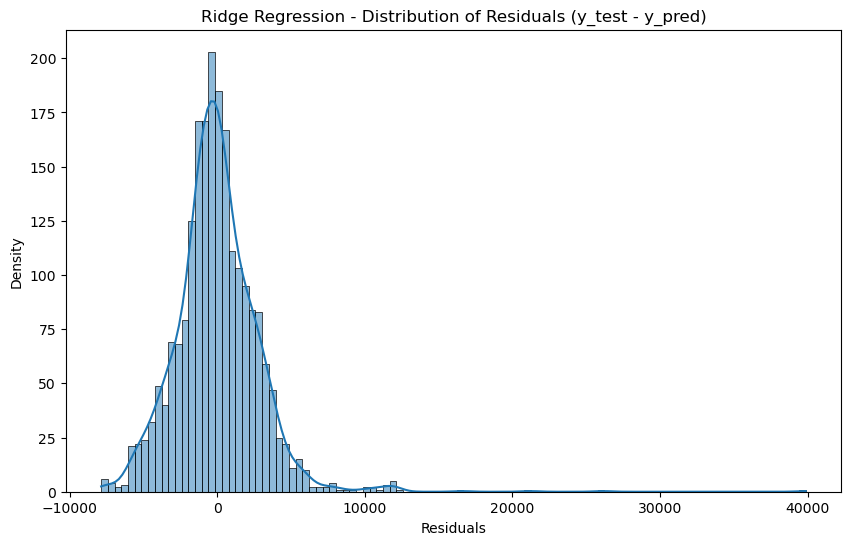

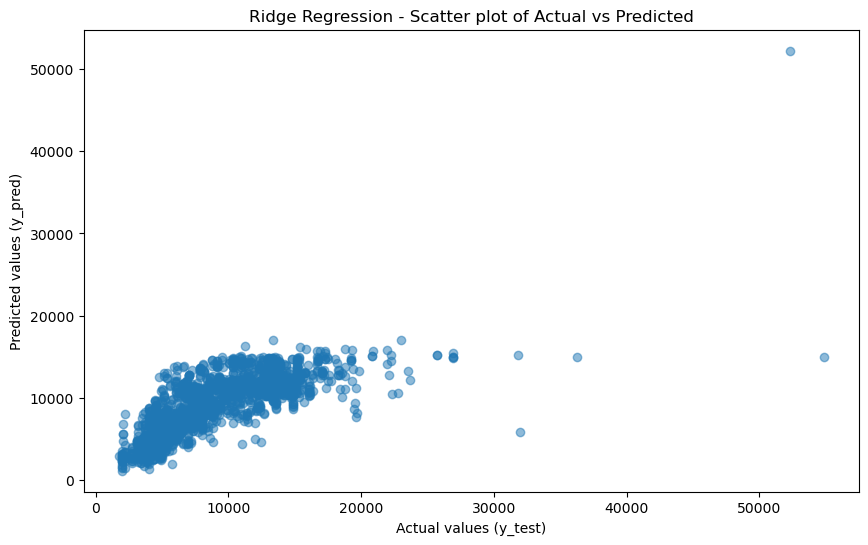

C:\Users\kumar\AppData\Local\Temp\ipykernel_26712\3518947902.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


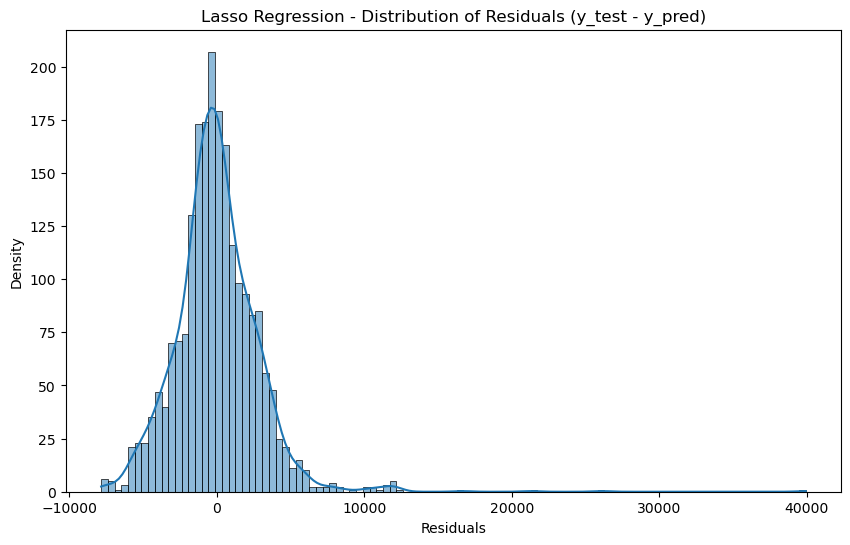

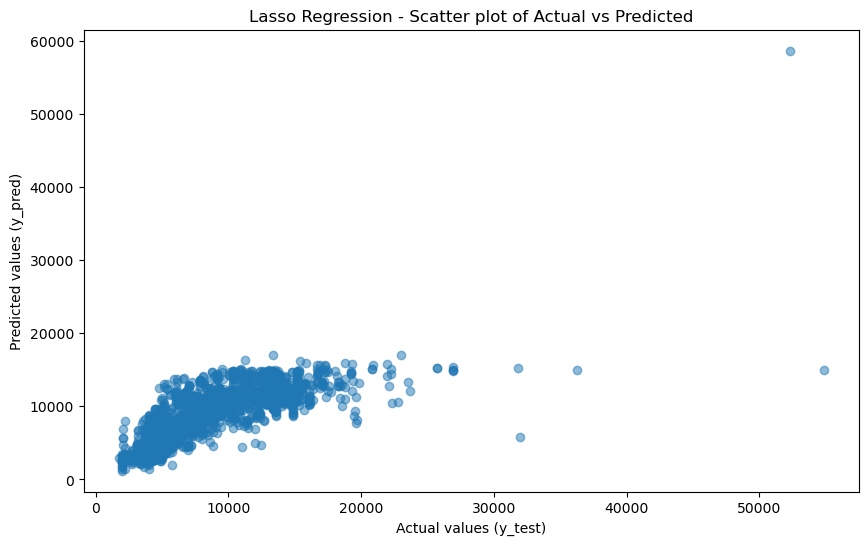

C:\Users\kumar\AppData\Local\Temp\ipykernel_26712\3518947902.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


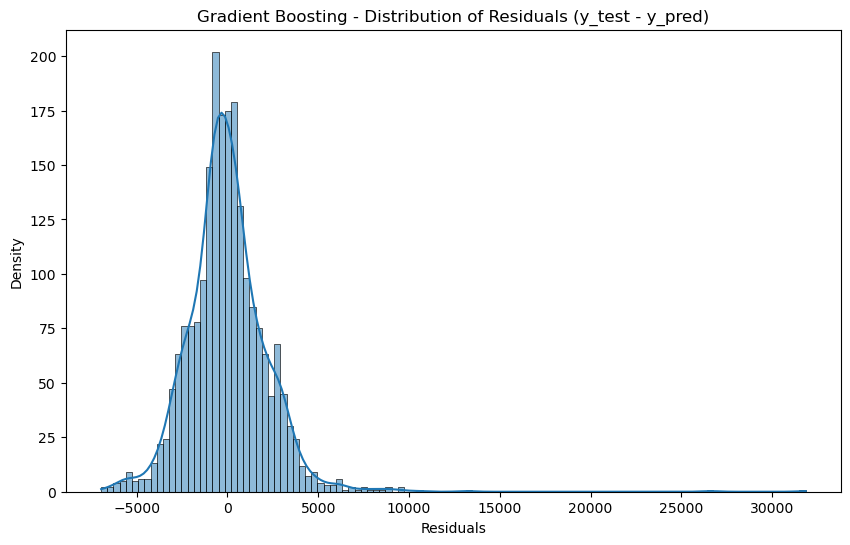

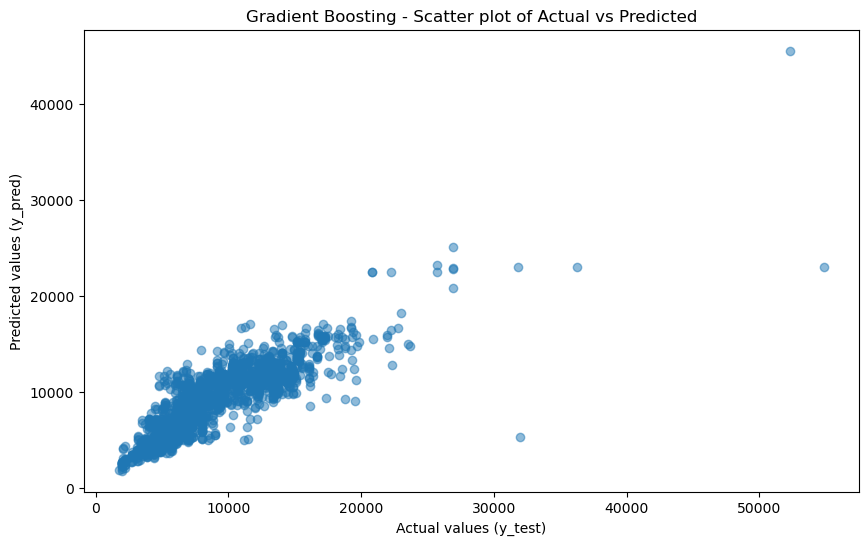

C:\Users\kumar\AppData\Local\Temp\ipykernel_26712\3518947902.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


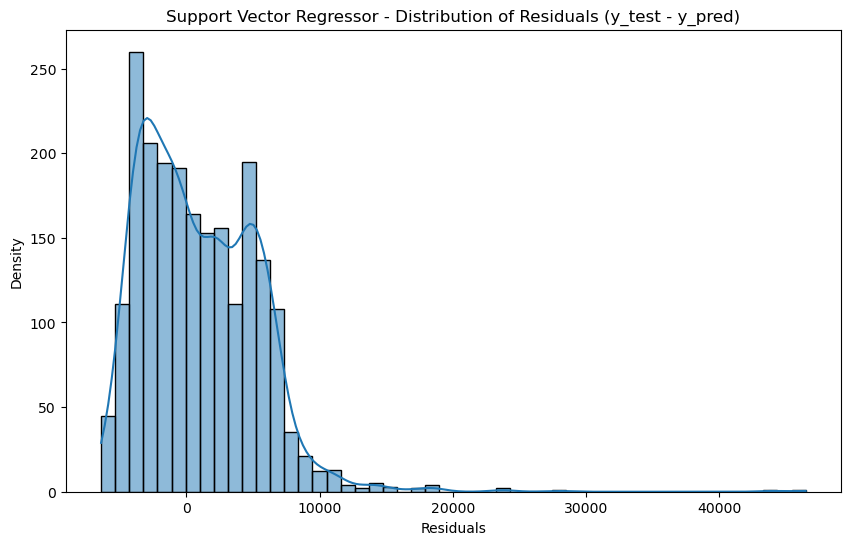

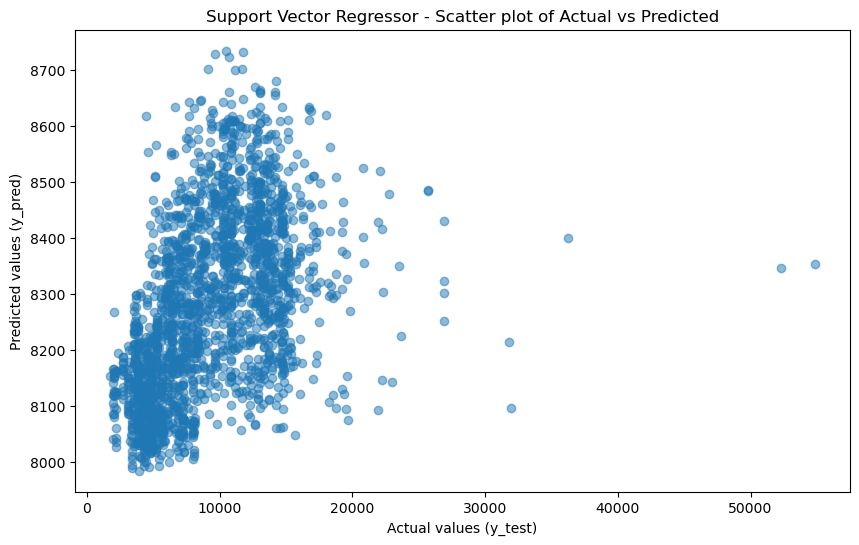

Model Performance:
                      Model           MSE          MAE         RMSE  R² Score
0             Random Forest  4.049958e+06  1203.697848  2012.450630  0.800038
1         Linear Regression  8.276061e+06  1998.028069  2876.814310  0.591380
2          Ridge Regression  8.252355e+06  1998.443802  2872.691221  0.592550
3          Lasso Regression  8.273141e+06  2000.012876  2876.306831  0.591524
4         Gradient Boosting  5.083044e+06  1564.260489  2254.560613  0.749031
5  Support Vector Regressor  2.048688e+07  3507.419058  4526.243280 -0.011514


In [118]:

# DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'RMSE', 'R² Score'])

# Iterate through the models
for model_name, model in Models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = metrics.mean_squared_error(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)
    
    # Append results to the DataFrame
    results_df = results_df.append({
        'Model': model_name,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R² Score': r2
    }, ignore_index=True)
    
    # Calculate residuals
    residuals = y_test - y_pred

    # Plot the distribution of residuals
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.title(f"{model_name} - Distribution of Residuals (y_test - y_pred)")
    plt.xlabel("Residuals")
    plt.ylabel("Density")
    plt.show()

    # Plot y_test vs. y_pred scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title(f"{model_name} - Scatter plot of Actual vs Predicted")
    plt.xlabel("Actual values (y_test)")
    plt.ylabel("Predicted values (y_pred)")
    plt.show()

# Display the results for all models
print("Model Performance:")
print(results_df)

# Hyperparameter Tuning

In [122]:
# Select the best model and do the hyperparameter tuning on that model
from sklearn.model_selection import RandomizedSearchCV

In [123]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [124]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [126]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, 
                               cv = 5, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = 1)

In [127]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [128]:
# Now check the best parameter
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [131]:
rf_prediction = rf_random.predict(X_test)
rf_prediction

array([ 8941.87362301,  6104.37056032,  7903.49522352, ...,
        2565.21816138, 12008.93515658,  5818.48978014])

C:\Users\kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


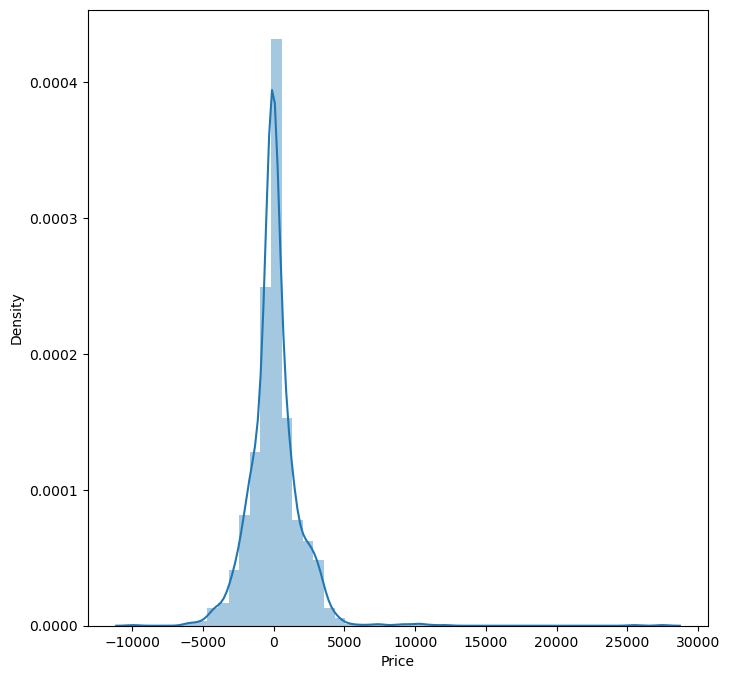

In [132]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-rf_prediction)
plt.show()

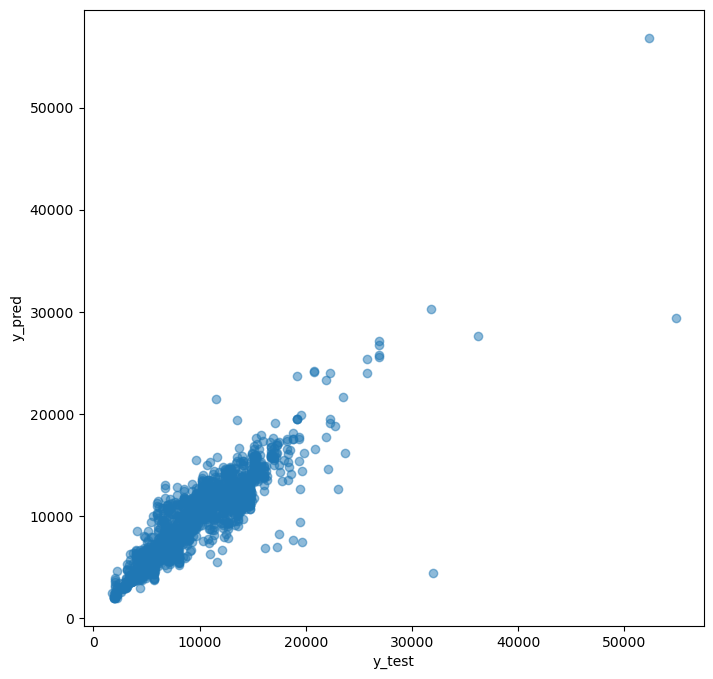

In [133]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, rf_prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [146]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_prediction))
print('MSE:', metrics.mean_squared_error(y_test, rf_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_prediction)))
print('R2 Score:', metrics.r2_score(y_test, rf_prediction))

MAE: 1149.6144760125
MSE: 3520190.3368381835
RMSE: 1876.2170281814904
R2 Score: 0.8261949466911328


# Save The Model

In [147]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf_random.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [148]:
# Load the model
model =  open('flight_rf_random.pkl', 'rb')
forest = pickle.load(model)

In [150]:
y_prediction = forest.predict(X_test)
y_prediction

array([ 8941.87362301,  6104.37056032,  7903.49522352, ...,
        2565.21816138, 12008.93515658,  5818.48978014])

In [151]:
metrics.r2_score(y_test, y_prediction)

0.8261949466911328